In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from model import Model
from IPython import display
import cv2

%matplotlib inline
%reload_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 5)


In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.empty_cache()

Use a dataset with 400 images
Use a dataset with 400 images
Epoch:   0 G: 3.365 Time: 6.15s
      Test G: 2.562(2.562) Time: 4.25s [S]


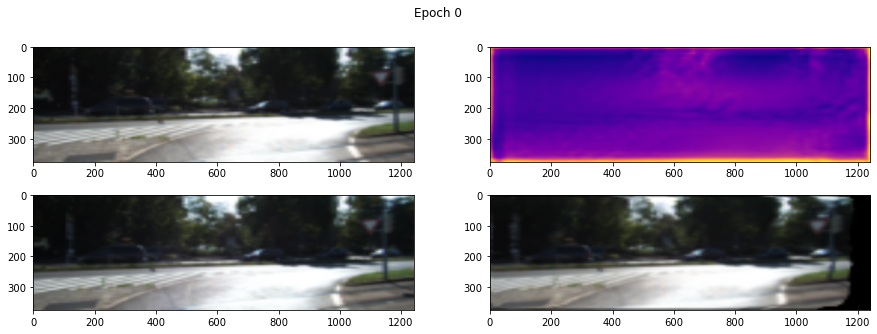

Epoch:   1 G: 3.145 Time: 5.49s
      Test G: 3.037(2.562) Time: 3.51s [*]


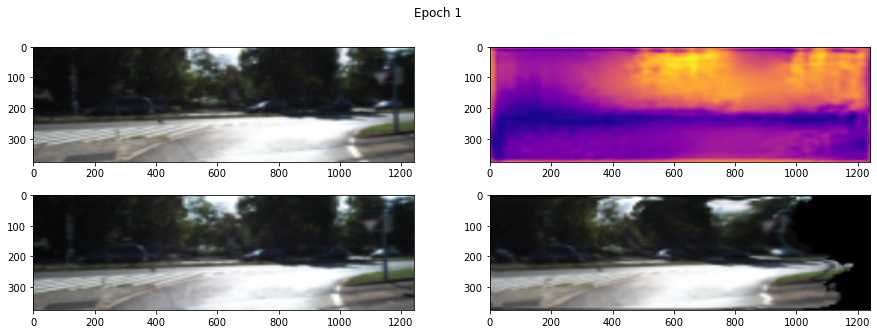

KeyboardInterrupt: 

In [4]:

model = Model(
    use_multiple_gpu=False,
    model_path='model_unsupervised',
    batch_size=16,
    val_dataset_dir='../depth/data_scene_flow/testing',
    train_dataset_dir='../depth/data_scene_flow/training',
    input_height=64,
    input_width=128
)

fig, ax = plt.subplots(ncols=2, nrows=2)
epochs = 50

for epoch in range(epochs):
    model.train(epoch)
    fig.suptitle('Epoch {}'.format(epoch))
    disp_est, left, right, right_est = model.test()
    resized_left = cv2.resize(np.moveaxis(left[0], 0, -1), (1242, 375), interpolation=cv2.INTER_LINEAR)
    resized_disp_est = cv2.resize(np.abs(disp_est[0]), (1242, 375), interpolation=cv2.INTER_LINEAR)
    resized_right = cv2.resize(np.moveaxis(right[0], 0, -1), (1242, 375), interpolation=cv2.INTER_LINEAR)
    resized_right_est = cv2.resize(np.moveaxis(right_est[0], 0, -1), (1242, 375), interpolation=cv2.INTER_LINEAR)
    ax[0][0].imshow(resized_left)
    ax[0][1].imshow(resized_disp_est, cmap='plasma') 
    ax[1][0].imshow(resized_right)
    ax[1][1].imshow(resized_right_est)
    
    display.display(plt.gcf())